[7, 'transformer', 0.8447415329768271, 0.8544897959183674, 0.04196488832673702, 0.04125243210092331, 0.8696145124716554, 0.8544897959183675, 0.8472535680939043]

In [1]:
# library imports
import pandas as pd
import gensim
from Codes.Supervised_Trainer_tran import run_end_to_end
from sklearn.model_selection import StratifiedKFold
from tqdm.notebook import tqdm
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.multiclass import OneVsRestClassifier
import plotly.express as px
import os

##########
#parameter
##########
# Define the range for top_k using tqdm
range_start = 4
range_end = 6
# model = ["transformer"]
# # model = ["lstm_with_attention", "just_attention", "transformer"]
# #full list mode all models
# model = ["lstm_with_attention", "just_attention", "transformer", "countvectorizer", "doc2vec_dbow", "doc2vec_dm", "word2vec_cbow", "word2vec_sg", "fasttext_sg", "fasttext_cbow"]            

############################################
#Import all csv file under Train_data folder
############################################

folder_path = "Train_data"
# List to hold DataFrames
dataframes = []
# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        dataframes.append(df)

combined_data = pd.concat(dataframes, ignore_index=True)
combined_data.to_csv('combined_train_data.csv', index=False)
file_path = os.path.join('combined_train_data.csv')
data = pd.read_csv(file_path)



############################
#import word embedding model
############################
K = 5
known_unknown = False

# Define the base path for the models
base_path = "Embedding_Models"

# Use os.path.join to construct the file paths
model_dm_path = os.path.join(base_path, "doc2vec_dm")
model_dbow_path = os.path.join(base_path, "doc2vec_dbow")
model_cbow_path = os.path.join(base_path, "word2vec_cbow")
model_sg_path = os.path.join(base_path, "word2vec_sg")
model_fasttext_sg_path = os.path.join(base_path, "fasttext_sg")
model_fasttext_cbow_path = os.path.join(base_path, "fasttext_cbow")

# Load the models
model_dm = gensim.models.doc2vec.Doc2Vec.load(model_dm_path)
model_dbow = gensim.models.doc2vec.Doc2Vec.load(model_dbow_path)
model_cbow = gensim.models.word2vec.Word2Vec.load(model_cbow_path)
model_sg = gensim.models.word2vec.Word2Vec.load(model_sg_path)
model_fasttext_sg = gensim.models.word2vec.Word2Vec.load(model_fasttext_sg_path)
model_fasttext_cbow = gensim.models.word2vec.Word2Vec.load(model_fasttext_cbow_path)

2024-07-01 23:13:12.539351: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
# featurizers = [
#     "countvectorizer",
#     "doc2vec_dbow",
#     "doc2vec_dm",
#     "word2vec_cbow",
#     "word2vec_sg",
#     "fasttext_sg",
#     "fasttext_cbow",
#     "lstm_with_attention",
#     "just_attention",
#     "vanilla_lstm",
#     "transformer"
# ]
from Codes.Supervised_Trainer_tran import run_end_to_end
featurizers = [
    "transformer"
]

  0%|          | 0/1 [00:00<?, ?it/s]

Currently running for featurizer transformer with 11 number of classes.


/common/sghoshstat/ywu39393/DKL/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/common/sghoshstat/ywu39393/DKL/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/common/sghoshstat/ywu39393/DKL/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[11, 'transformer', 0.7268686868686869, 0.7038311688311688, 0.045492015980920945, 0.044176296086937, 0.7264574314574315, 0.7038311688311688, 0.6873418025824444]


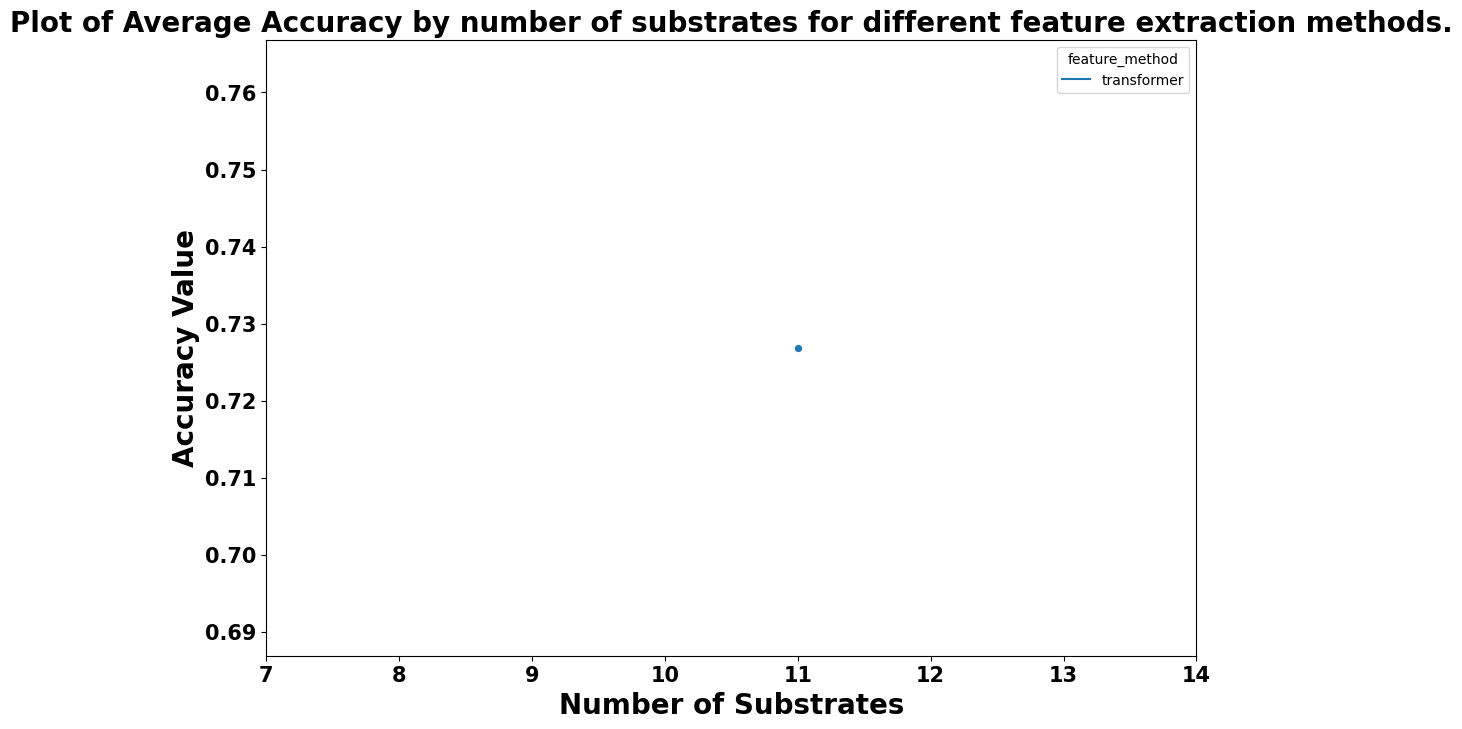

In [4]:
####################
#Training all models
####################

overall_catch = []
for top_k in tqdm(range(11,12)):
    for featurizer in featurizers:
        print("Currently running for featurizer "+ featurizer + " with " + str(top_k) + " number of classes.")
        if featurizer == "countvectorizer":
            avg_acc, avg_class_acc, std_err_avg_acc, std_err_avg_classwise_acc, overall_report,  model, params_best, fig, fig2, fig3 = run_end_to_end(top_k, data, featurizer, K, known_unknown, None)
        elif featurizer == "doc2vec_dbow":
            avg_acc, avg_class_acc, std_err_avg_acc, std_err_avg_classwise_acc, overall_report,  model, params_best, fig, fig2, fig3 = run_end_to_end(top_k, data, featurizer, K, known_unknown, model_dbow)
        elif featurizer == "doc2vec_dm":
            avg_acc, avg_class_acc, std_err_avg_acc, std_err_avg_classwise_acc, overall_report,  model, params_best, fig, fig2, fig3 = run_end_to_end(top_k, data, featurizer, K, known_unknown, model_dm)
        elif featurizer == "word2vec_cbow":
            avg_acc, avg_class_acc, std_err_avg_acc, std_err_avg_classwise_acc, overall_report,  model, params_best, fig, fig2, fig3 = run_end_to_end(top_k, data, featurizer, K, known_unknown, model_cbow)            
        elif featurizer == "word2vec_sg":
            avg_acc, avg_class_acc, std_err_avg_acc, std_err_avg_classwise_acc, overall_report,  model, params_best, fig, fig2, fig3 = run_end_to_end(top_k, data, featurizer, K, known_unknown, model_sg)
        elif featurizer == "fasttext_sg":
            avg_acc, avg_class_acc, std_err_avg_acc, std_err_avg_classwise_acc, overall_report,  model, params_best, fig, fig2, fig3 = run_end_to_end(top_k, data, featurizer, K, known_unknown, model_fasttext_sg)      
        elif featurizer == "fasttext_cbow":
            avg_acc, avg_class_acc, std_err_avg_acc, std_err_avg_classwise_acc, overall_report,  model, params_best, fig, fig2, fig3 = run_end_to_end(top_k, data, featurizer, K, known_unknown, model_fasttext_cbow)  
            
        elif featurizer == "lstm_with_attention": 
            avg_acc, avg_class_acc, std_err_avg_acc, std_err_avg_classwise_acc, overall_report,  model, params_best, fig, fig2, fig3 = run_end_to_end(top_k, data, featurizer, K, known_unknown, model_sg)
        
        elif featurizer == "just_attention": 
            avg_acc, avg_class_acc, std_err_avg_acc, std_err_avg_classwise_acc, overall_report,  model, params_best, fig, fig2, fig3 = run_end_to_end(top_k, data, featurizer, K, known_unknown, model_sg)        
        
        elif featurizer == "vanilla_lstm": 
            avg_acc, avg_class_acc, std_err_avg_acc, std_err_avg_classwise_acc, overall_report,  model, params_best, fig, fig2, fig3 = run_end_to_end(top_k, data, featurizer, K, known_unknown, model_sg)        
        
        elif featurizer == "transformer": 
            avg_acc, avg_class_acc, std_err_avg_acc, std_err_avg_classwise_acc, overall_report,  model, params_best, fig, fig2, fig3 = run_end_to_end(top_k, data, featurizer, K, known_unknown, model_sg)        
        
        else:
            pass
        
        overall_catch.append([top_k, featurizer, avg_acc, avg_class_acc, std_err_avg_acc, std_err_avg_classwise_acc, 
                             overall_report["precision"], overall_report["recall"], overall_report["f1-score"]])
        print([top_k, featurizer, avg_acc, avg_class_acc, std_err_avg_acc, std_err_avg_classwise_acc, 
                             overall_report["precision"], overall_report["recall"], overall_report["f1-score"]])
        plt.close('all')
        
#save all output to csv file
overall_catch = pd.DataFrame(overall_catch)
overall_catch.columns = ["num_substrates", "feature_method", "avg_accuracy", "avg_classwise_acc",
                         "std_err_avg_acc", "std_err_avg_classwise_acc", "avg_precision", "avg_recall", "avg_f1_score"]
overall_catch.to_csv('Comparison result of all models.csv', index = False)

#create a comparsion plot
plt.figure(figsize = (12,8))
sns.lineplot(data=overall_catch,  x="num_substrates", y="avg_accuracy", hue="feature_method",  marker="o")
plt.title("Plot of Average Accuracy by number of substrates for different feature extraction methods.", fontsize = 20 ,weight = "bold")
plt.xlabel("Number of Substrates",  weight = "bold", fontsize = 20)
plt.ylabel("Accuracy Value", weight = "bold", fontsize = 20)
plt.xticks(range(7,15), weight = "bold", fontsize = 15)
plt.yticks(weight = "bold", fontsize = 15, rotation = 0)
plt.savefig('Accuracy plot.png')

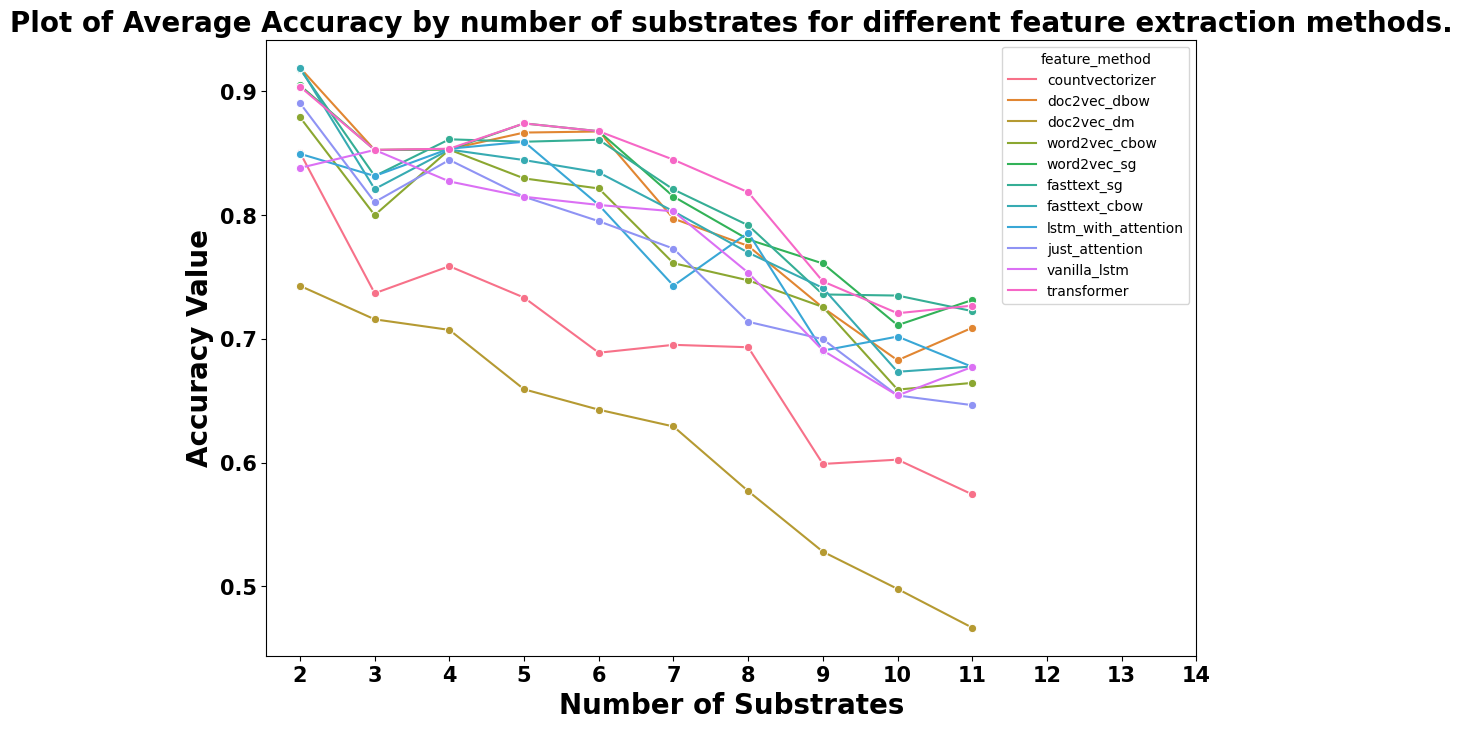

In [5]:
overall_catch = pd.read_csv('Comparison result of all models.csv')


#create a comparsion plot
plt.figure(figsize = (12,8))
sns.lineplot(data=overall_catch,  x="num_substrates", y="avg_accuracy", hue="feature_method",  marker="o")
plt.title("Plot of Average Accuracy by number of substrates for different feature extraction methods.", fontsize = 20 ,weight = "bold")
plt.xlabel("Number of Substrates",  weight = "bold", fontsize = 20)
plt.ylabel("Accuracy Value", weight = "bold", fontsize = 20)
plt.xticks(range(2,15), weight = "bold", fontsize = 15)
plt.yticks(weight = "bold", fontsize = 15, rotation = 0)
plt.savefig('Accuracy plot.png')